# Phenotype phase plane analysis

In [22]:
%run 01_loading_model.ipynb

from cobra.flux_analysis.phenotype_phase_plane import production_envelope

### Increasing glucose concentration in medium

In [23]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [3]:
medium = model.medium
# Amping glucose levels to 1000.0
medium['r_1714'] = 1000.0
model.reactions.r_1714.bounds = -1000.0, 1000

### Phenotype phase plan for default objective i.e. biomass

In [4]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,14.679623,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,15.323794,0.0,0.0,-947.370216
2,r_1714,0.0,0.0,0.0,15.964078,0.0,0.0,-894.740432
3,r_1714,0.0,0.0,0.0,16.604362,0.0,0.0,-842.110648
4,r_1714,0.0,0.0,0.0,17.244646,0.0,0.0,-789.480864
5,r_1714,0.0,0.0,0.0,17.883518,0.0,0.0,-736.851080
6,r_1714,0.0,0.0,0.0,18.522355,0.0,0.0,-684.221296
7,r_1714,0.0,0.0,0.0,19.158407,0.0,0.0,-631.591512
8,r_1714,0.0,0.0,0.0,19.789829,0.0,0.0,-578.961728
9,r_1714,0.0,0.0,0.0,18.933901,0.0,0.0,-526.331944


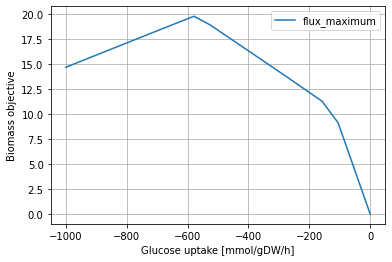

In [5]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/gDW/h]", ylabel="Biomass objective", grid = True)

### Creating a phenotype phase plan for lycopene flux vs. glucose uptake (exchange reaction).

In [6]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,NaN,24.981325,6.162060e-01,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,25.779807,6.712285e-01,NaN,-947.370216
2,r_1714,0.0,0.0,NaN,25.825441,7.119691e-01,NaN,-894.740432
3,r_1714,0.0,0.0,NaN,25.825441,7.564654e-01,NaN,-842.110648
4,r_1714,0.0,0.0,NaN,25.825441,8.068942e-01,NaN,-789.480864
5,r_1714,0.0,0.0,NaN,25.825441,8.645268e-01,NaN,-736.851080
6,r_1714,0.0,0.0,NaN,25.825441,9.310256e-01,NaN,-684.221296
7,r_1714,0.0,0.0,NaN,25.810275,1.008015e+00,NaN,-631.591512
8,r_1714,0.0,0.0,NaN,25.523052,1.087410e+00,NaN,-578.961728
9,r_1714,0.0,0.0,NaN,25.167446,1.179478e+00,NaN,-526.331944


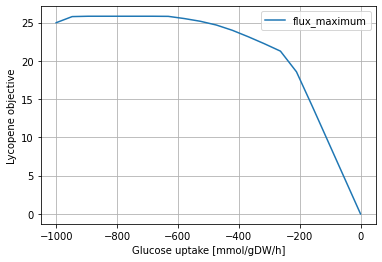

In [7]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

### Phenotype phase plan for oxygen uptake vs. biomass formation

In [8]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_exchange],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,0.0,9.008634,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,10.017155,0.0,0.0,-947.368421
2,r_1714,0.0,0.0,0.0,11.025677,0.0,0.0,-894.736842
3,r_1714,0.0,0.0,0.0,12.034198,0.0,0.0,-842.105263
4,r_1714,0.0,0.0,0.0,13.042720,0.0,0.0,-789.473684
5,r_1714,0.0,0.0,0.0,14.051242,0.0,0.0,-736.842105
6,r_1714,0.0,0.0,0.0,15.059763,0.0,0.0,-684.210526
7,r_1714,0.0,0.0,0.0,16.068285,0.0,0.0,-631.578947
8,r_1714,0.0,0.0,0.0,17.076806,0.0,0.0,-578.947368
9,r_1714,0.0,0.0,0.0,18.085328,0.0,0.0,-526.315789


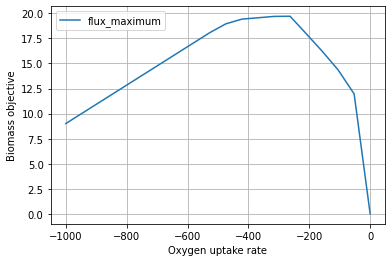

In [9]:
ppp_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate", ylabel="Biomass objective", grid=True)

In [10]:
ppp_lyco_vs_o2 = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.CrtI)
ppp_lyco_vs_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,NaN,10.356402,0.560606,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,11.640099,0.624814,NaN,-947.368421
2,r_1714,0.0,0.0,NaN,12.923797,0.687954,NaN,-894.736842
3,r_1714,0.0,0.0,NaN,14.207494,0.750054,NaN,-842.105263
4,r_1714,0.0,0.0,NaN,15.491191,0.811138,NaN,-789.473684
5,r_1714,0.0,0.0,NaN,16.774888,0.871232,NaN,-736.842105
6,r_1714,0.0,0.0,NaN,18.058585,0.930359,NaN,-684.210526
7,r_1714,0.0,0.0,NaN,19.342282,0.988543,NaN,-631.578947
8,r_1714,0.0,0.0,NaN,20.566721,0.988840,NaN,-578.947368
9,r_1714,0.0,0.0,NaN,21.663213,0.889476,NaN,-526.315789


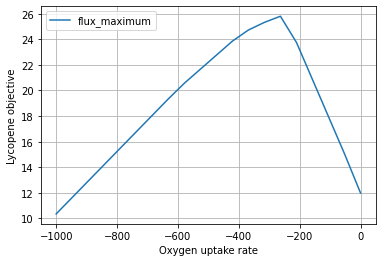

In [11]:
ppp_lyco_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate", ylabel="Lycopene objective", grid=True)

It seems as though the yeast is subject to oxygen stress, when the uptake rate is increased above the bound of (i.e. $<-250$).



In [24]:
from cameo.strain_design import OptGene

In [25]:
optgene = OptGene(model)

In [ ]:
result = optgene.run(target=model.reactions.CrtI,
                    biomass=growth,
                    substrate=model.metabolites.get_by_id('s_0565[e]'),
                    max_evaluations=100,
                    plot=True)